## Some summary statistics of a single user

In [41]:
import spacy
from scattertext import SampleCorpora, whitespace_nlp_with_sentences
from scattertext import produce_scattertext_explorer
from scattertext.CorpusFromPandas import CorpusFromPandas
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import unicodedata
import nltk
from wordcloud import WordCloud, STOPWORDS
from os import path
from scipy.misc import imread
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Import Data

In [42]:
df = pd.read_csv("./hellofashionblog_features.csv", sep=',', 
                 encoding = 'utf8', header=None, 
                 names=["id","comments", "caption","tags"])
df.head()

,id,comments,caption,tags
0,https://scontent-arn2-1.cdninstagram.com/t51.2...,Love this Hairstyle 😍😍 Gorgeous A gift guide f...,1. Big curls and lots of volume. I always opt ...,NaN
1,https://scontent-arn2-1.cdninstagram.com/t51.2...,Cutest bffs ever 🧡🧡 Cuties! Love this! 💕 This ...,Girl time! Talking perfume puppies kittens ...,sponsored girltalk weekend flowerbomb
2,https://scontent-arn2-1.cdninstagram.com/t51.2...,this is precious !!! The perfect couple Casual...,From a few weeks ago but excited to see his cu...,NaN
3,https://scontent-arn2-1.cdninstagram.com/t51.2...,LOVE ❤️!! Gorgeous in red! Obsessed ❤️❤️ Prett...,You guys I can't believe Thanksgiving is next...,bebebabe sponsored holidaystyle
4,https://scontent-arn2-1.cdninstagram.com/t51.2...,Love love love this pic! 🙌🏼❤️✨✨✨ U and ur girl...,When you wish upon a star 💫 #dreamer,dreamer


In [43]:
df.describe()

,id,comments,caption,tags
count,3153,3149,3131,2383
unique,3153,3149,3121,2066
top,https://scontent-arn2-1.cdninstagram.com/t51.2...,Pretty lady! ❤️ @abbygiff0rd Beautiful 💕💕 I th...,❤️,liketkit
freq,1,1,5,55


## Count the tag frequency and plot the 5 most common tags (user tags in post)

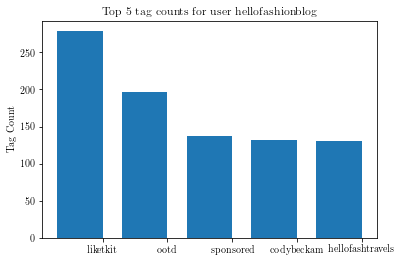

In [44]:
tagsDF = df["tags"]
tags = []
# Merge the DF into a single list with all the tags
for index, row in df.iterrows():
    if type(row["tags"]) != float: #Remove emojis
        tags = tags + map(lambda x: x.decode("utf-8"), row["tags"].encode("utf-8").split(" "))
# Count the tags
counter = Counter(tags)
top_tags = []
top_counts = []
for tag, count in counter.most_common(5):
    top_tags.append(tag)
    top_counts.append(count)
# Plot the counts
indexes = np.arange(len(top_tags))
width = 0.7
plt.bar(indexes, top_counts, width)
plt.xticks(indexes + width * 0.5, top_tags)
plt.ylabel('Tag Count')
plt.title('Top 5 tag counts for user hellofashionblog')
plt.savefig('figures/tag_hist.pdf', format='pdf', dpi=1000)
plt.show()

In [45]:
map(lambda x: x.encode("utf-8"), top_tags)

['liketkit', 'ootd', 'sponsored', 'codybeckam', 'hellofashtravels']

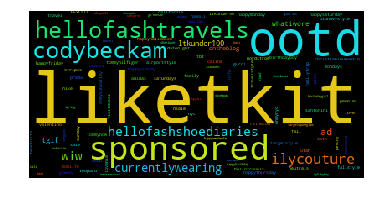

In [46]:
def mapUnicode(x):
    try:
        return x.encode("ascii")
    except:
          return "emoji"
tagsStr = " ".join(map(mapUnicode, tags))
wordcloud = WordCloud(
                      relative_scaling = 1.0
                      ).generate(tagsStr)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('figures/tag_wordcloud.pdf', format='pdf', dpi=1000)
plt.show()

## Count the word frequency in comments and plot the 5 most common words

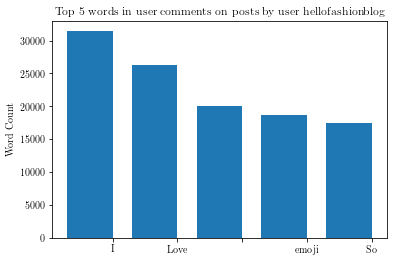

In [47]:
from spacy.lang.en.stop_words import STOP_WORDS
commentsDF = df["comments"]
words = []
# Merge the DF into a single list with all the comments
for index, row in df.iterrows():
    if type(row["comments"]) == unicode: #remove emojis
        words = words + map(lambda x: x.decode("utf-8"), row["comments"].encode("utf-8").split(" "))
#remove stopwords
words = list(filter(lambda x: x not in STOP_WORDS, words))
# Count the words
counter = Counter(words)
top_words= []
top_counts = []
for word, count in counter.most_common(5):
    top_words.append(word)
    top_counts.append(count)

def mapUnicode(x):
    try:
        return x.encode("ascii")
    except:
          return "emoji"
unicode_top_words = top_words
top_words = map(mapUnicode, top_words)
# Plot the counts
indexes = np.arange(len(top_words))
width = 0.7
plt.bar(indexes, top_counts, width)
plt.xticks(indexes + width * 0.5, top_words)
plt.ylabel('Word Count')
plt.title('Top 5 words in user comments on posts by user hellofashionblog')
plt.savefig('figures/comments_hist.pdf', format='pdf', dpi=1000)
plt.show()

In [48]:
for x in unicode_top_words:
    print(x.encode("utf-8"))

I
Love

😍
So


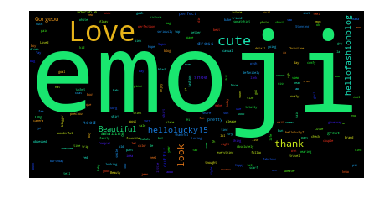

In [49]:
commentsStr = " ".join(map(mapUnicode, words))
wordcloud = WordCloud(
                      relative_scaling = 1.0
                      ).generate(commentsStr)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('figures/comments_wordcloud.pdf', format='pdf', dpi=1000)
plt.show()

## Count the word frequency in captions and plot the 5 most common words

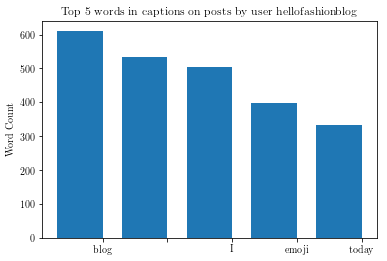

In [50]:
commentsDF = df["caption"]
words = []
# Merge the DF into a single list with all the captions
for index, row in df.iterrows():
    if type(row["caption"]) == unicode: #remove emojis
        words = words + map(lambda x: x.decode("utf-8"), row["caption"].encode("utf-8").split(" "))
#remove stopwords
words = list(filter(lambda x: x not in STOP_WORDS, words))
# Count the words
counter = Counter(words)
top_words= []
top_counts = []
for word, count in counter.most_common(5):
    top_words.append(word)
    top_counts.append(count)

def mapUnicode(x):
    try:
        return x.encode("ascii")
    except:
          return "emoji"
unicode_top_words = top_words
top_words = map(mapUnicode, top_words)
top_words = map(lambda x: x.replace("#","\#"), top_words)
# Plot the counts
indexes = np.arange(len(top_words))
width = 0.7
plt.bar(indexes, top_counts, width)
plt.xticks(indexes + width * 0.5, top_words)
plt.ylabel('Word Count')
plt.title('Top 5 words in captions on posts by user hellofashionblog')
plt.savefig('figures/caption_hist.pdf', format='pdf', dpi=1000)
plt.show()

In [51]:
for x in unicode_top_words:
    print(x.encode("utf-8"))

blog

I
❤️
today


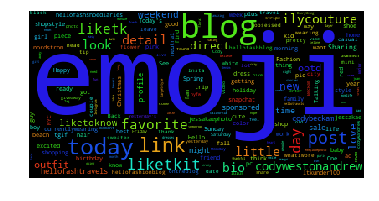

In [52]:
captionsStr = " ".join(map(mapUnicode, words))
wordcloud = WordCloud(
                      relative_scaling = 1.0
                      ).generate(captionsStr)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('figures/caption_wordcloud.pdf', format='pdf', dpi=1000)
plt.show()